### Demonstration of Data Collection / Extraction from various sources

As part of Data Scientist activities, Data collection or extraction is one of the steps which takes quite a good amount of time and effort 

###### For this particular Use Case, we are extracting state wise Covid-19 cases in USA from various sources 

#### There are multiple sources in which data is resided & a Data Scientist should be able to extract the data. Below are few sources
1.Website <br>
2.API <br>
3.Documents such as PDF <br>
4.RDBMS <br>

##### Exercise 1: To scrape the data from a website

In [93]:
# Import libraries
import requests
import numpy as np
import pandas as pd
from pathlib import Path

In [94]:
Data_URL = 'https://www.worldometers.info/coronavirus/country/us/'

r = requests.get(Data_URL)
print(f'Status: {r.status_code}') # Status: 200 states that the response is success from website

Status: 200


Documentation for BeautifulSoup library - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [95]:
# Import BeautifulSoup
import bs4
from bs4 import BeautifulSoup as BS

page = BS(r.content, 'html.parser')
table = page.table

In [96]:
print(table.tbody.tr.prettify())

<tr class="total_row_usa">
 <td style="text-align:left;">
  USA Total
 </td>
 <td>
  2,727,996
 </td>
 <td>
  +143
 </td>
 <td>
  130,123
 </td>
 <td>
  +1
 </td>
 <td>
  1,454,383
 </td>
 <td>
  8,242
 </td>
 <td>
  393
 </td>
 <td>
  34,199,918
 </td>
 <td>
  103,322
 </td>
 <td>
 </td>
 <td>
 </td>
</tr>



In [147]:
from typing import List

def extract_from_table(table: bs4.element.Tag) -> List:
    '''Extracts data from HTML table.
    
    Input:  bs4 *table*
    Return: List of all the values in the table
    '''
    data = list()
    
    for row in table.select('tbody tr'):
        data.append([col.text for col in row.find_all('td')])
        
    return data

data_table = extract_from_table(table)
data_table[0:10]

[['USA Total',
  '2,727,996',
  '+143',
  '130,123',
  '+1',
  '1,454,383',
  '8,242',
  '393',
  '34,199,918',
  '103,322',
  '\xa0',
  '\xa0'],
 ['\nNew York ',
  '417,836 ',
  '\n',
  '\n32,129 ',
  ' ',
  '\n296,232 ',
  '21,479',
  '1,652',
  '\n3,914,938 ',
  '201,245',
  '\n[view by county]\xa0[1]\xa0[2]\xa0[3]\xa0[4]\xa0 ',
  '\n[projections]\n'],
 ['\nCalifornia ',
  '230,891 ',
  '\n',
  '\n6,081  ',
  ' ',
  '\n161,148 ',
  '5,844',
  '154',
  '\n4,168,509 ',
  '105,499',
  '\n[view by county]\xa0[1]\xa0 ',
  '\n[projections]\n'],
 ['\nNew Jersey ',
  '176,953 ',
  '\n',
  '\n15,177 ',
  ' ',
  '\n116,634 ',
  '19,922',
  '1,709',
  '\n1,422,374 ',
  '160,138',
  '\n[view by county]\xa0[1]\xa0 ',
  '\n [projections]\n'],
 ['\nTexas ',
  '167,269 ',
  '\n',
  '\n2,496 ',
  ' ',
  '\n79,955 ',
  '5,769',
  '86',
  '\n2,119,036 ',
  '73,081',
  '\n[view by county]\xa0[1]\xa0[2]\xa0 ',
  '\n[projections]\n'],
 ['\nFlorida ',
  '152,434 ',
  '\n',
  '\n3,505 ',
  ' ',
  '\n125,01

In [98]:
# Setting the column names 
columns = ['USA State','Total Cases','New Cases','Total Deaths','New Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop','View','projections']
stats = pd.DataFrame(data_table, columns=columns)
stats.dtypes

USA State                 object
Total Cases               object
New Cases                 object
Total Deaths              object
New Deaths                object
Active Cases              object
Total Cases per 1M pop    object
Deaths per 1M pop         object
Total Tests               object
Tests per 1M pop          object
View                      object
projections               object
dtype: object

In [99]:
stats.head(2)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,View,projections
0,USA Total,"2,727,996",+143,"130,123",+1,"1,454,383","8,242",393,"34,199,918","103,322",,
1,\nNew York,"417,836",\n,"\n32,129",,"\n296,232","21,479","1,652","\n3,914,938","201,245",\n[view by county] [1] [2] [3] [4],\n[projections]\n


In [100]:
# Lets remove unwanted columns from the data set
cols=['New Cases','New Deaths','View','projections']
stats.drop(columns=cols,inplace=True)

In [101]:
stats.head(2)

,USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop
0,USA Total,"2,727,996","130,123","1,454,383","8,242",393,"34,199,918","103,322"
1,\nNew York,"417,836","\n32,129","\n296,232","21,479","1,652","\n3,914,938","201,245"


In [102]:
# Data Clean up 
# Below function iterates through every column in the df, to iterarte through each column
def cleanup_df():
    for col in stats.columns:
        print(col)
        stats[col]=stats[col].str.replace(',','') # Replacing commma with blank
        stats[col]=stats[col].str.replace('\n','',regex=True) # Replacing \n with blank
        #stats[col]=stats[col].str.replace("",'0')
        stats[col]=stats[col].str.strip() # Stripping the unwanted spaces at the start & at the end of the values in the column
        stats.loc[stats[col] =='', col] = 0 # Assigning a value '0', where there are no values in the data set

In [104]:
# Calling the function
cleanup_df()

USA State
Total Cases
Total Deaths
Active Cases
Total Cases per 1M pop
Deaths per 1M pop
Total Tests
Tests per 1M pop


In [105]:
# All the columns are in string data type. Need to convert into 'int' data type to perform arithematic operations further
stats[['Total Cases','Total Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop']] = stats[['Total Cases','Total Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop']].astype(int)

In [106]:
stats.head(2)

,USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop
0,USA Total,2727996,130123,1454383,8242,393,34199918,103322
1,New York,417836,32129,296232,21479,1652,3914938,201245


In [107]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   USA State               64 non-null     object
 1   Total Cases             64 non-null     int32 
 2   Total Deaths            64 non-null     int32 
 3   Active Cases            64 non-null     int32 
 4   Total Cases per 1M pop  64 non-null     int32 
 5   Deaths per 1M pop       64 non-null     int32 
 6   Total Tests             64 non-null     int32 
 7   Tests per 1M pop        64 non-null     int32 
dtypes: int32(7), object(1)
memory usage: 2.4+ KB


In [108]:
# Calculating the death rate at each state in US
stats['dead_rate'] = (stats['Total Deaths'] / stats['Total Cases'] * 100)
(stats
    .sort_values(by='dead_rate', ascending=False)   
    .head(5)
    .style
    .hide_index()
    .background_gradient(cmap='OrRd', subset='dead_rate')
)

USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,dead_rate
Connecticut,46514,4322,31220,13046,1212,466394,130815,9.291826
Michigan,70728,6193,13436,7082,620,1222547,122416,8.756080
New Jersey,176953,15177,116634,19922,1709,1422374,160138,8.576854
New York,417836,32129,296232,21479,1652,3914938,201245,7.689381
Massachusetts,108882,8054,9424,15797,1169,914646,132702,7.396999


In [109]:
# Calculating the cured rate at each state in US
stats['cured_rate'] = ((stats['Total Cases'] - stats['Active Cases'])/ stats['Total Cases'] * 100)
(stats
    .sort_values(by='cured_rate', ascending=False)   
    .head(5)
    .style
    .hide_index()
    .background_gradient(cmap='YlGn', subset='cured_rate')
)

USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,dead_rate,cured_rate
United States Virgin Islands,84,6,5,0,0,2907,0,7.142857,94.047619
North Dakota,3576,79,302,4693,104,106122,139256,2.209172,91.554810
Massachusetts,108882,8054,9424,15797,1169,914646,132702,7.396999,91.344759
Minnesota,36303,1476,3226,6437,262,605316,107333,4.065780,91.113682
South Dakota,6764,91,801,7646,103,80088,90530,1.345358,88.157895


##### Exercise 2: To Pull the data from API

Notes for extracting the data from API <br>
To pull or access the data through API, need host & key for the API. There can be few public APIs with no authenticaion required. 

In [111]:
DATA_URL = 'https://rapidapi.com/ZermeloTechnologies/api/covid-19-usa-data-by-zt'

r = requests.get(DATA_URL)
print(f'Status {r.status_code}')

Status 200


In [148]:
url = "https://covid-19-usa-data-by-zt.p.rapidapi.com/GetUSStateWiseData"

headers = {
    'x-rapidapi-host': "covid-19-usa-data-by-zt.p.rapidapi.com",
    'x-rapidapi-key': "e4a0f5191dmsh32f12c91288b7ffp11a5adjsn38b664d6d513"
    }

response = requests.request("GET", url, headers=headers)

#print(response.text)

In [113]:
type(response)

requests.models.Response

In [114]:
# Extracting the data from the 'Response' variable.
api = response.json()

New_Data = pd.DataFrame(api['data'])
New_Data.head()

,code,name,active,deaths,tested,confirmed,newdeaths,newtested,recovered,newconfirmed,newrecovered,lastupdatedtime
0,MO,Missouri,19996,1005,373007,21001,1,5601,0,176,0,2020-07-01 04:34:05
1,VT,Vermont,199,56,65764,1208,0,771,953,0,4,2020-07-01 04:34:05
2,MN,Minnesota,3226,1476,605316,36303,6,12361,31601,442,376,2020-07-01 04:34:05
3,DE,Delaware,4298,509,110881,11474,2,950,6667,98,2,2020-07-01 04:34:05
4,MI,Michigan,13436,6193,1045057,70728,32,15682,51099,505,0,2020-07-01 04:34:05


In [115]:
New_Data.shape

(50, 12)

Extracting new data from the other API

In [149]:
url = "https://covid-19-usa-data-by-zt.p.rapidapi.com/GetUSAllHistoricalData"

headers = {
    'x-rapidapi-host': "covid-19-usa-data-by-zt.p.rapidapi.com",
    'x-rapidapi-key': "e4a0f5191dmsh32f12c91288b7ffp11a5adjsn38b664d6d513"
    }

response1 = requests.request("GET", url, headers=headers)

#print(response1.text)

In [150]:
api1 = response1.json()

New_Data1 = pd.DataFrame(api1['records'])
New_Data1.head()

,dateofrecord,cases
0,2020-01-23,"{'dailytested': '0', 'totaltested': '0', 'dail..."
1,2020-01-24,"{'dailytested': '0', 'totaltested': '0', 'dail..."
2,2020-01-25,"{'dailytested': '0', 'totaltested': '0', 'dail..."
3,2020-01-26,"{'dailytested': '0', 'totaltested': '0', 'dail..."
4,2020-01-27,"{'dailytested': '0', 'totaltested': '0', 'dail..."


In [152]:
New_Data1['cases'][0]

{'dailytested': '0',
 'totaltested': '0',
 'dailydeceased': '0',
 'totaldeceased': '0',
 'dailyconfirmed': '0',
 'dailyrecovered': '0',
 'totalconfirmed': '1',
 'totalrecovered': '0'}

In [185]:
New_Data1.shape

(160, 2)

In [186]:
# Extracting the dictionary values from the column 'cases' in dataframe
New_Data2=New_Data1['cases'].apply(pd.Series)
New_Data1=pd.concat([New_Data1, New_Data2],axis=1)

In [190]:
New_Data1.head()

,dateofrecord,cases,dailytested,totaltested,dailydeceased,totaldeceased,dailyconfirmed,dailyrecovered,totalconfirmed,totalrecovered
0,2020-01-23,"{'dailytested': '0', 'totaltested': '0', 'dail...",0,0,0,0,0,0,1,0
1,2020-01-24,"{'dailytested': '0', 'totaltested': '0', 'dail...",0,0,0,0,1,0,2,0
2,2020-01-25,"{'dailytested': '0', 'totaltested': '0', 'dail...",0,0,0,0,0,0,2,0
3,2020-01-26,"{'dailytested': '0', 'totaltested': '0', 'dail...",0,0,0,0,3,0,5,0
4,2020-01-27,"{'dailytested': '0', 'totaltested': '0', 'dail...",0,0,0,0,0,0,5,0


C:\Users\bhargav.potluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys
C:\Users\bhargav.potluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
C:\Users\bhargav.potluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if __name__ == '__main__':


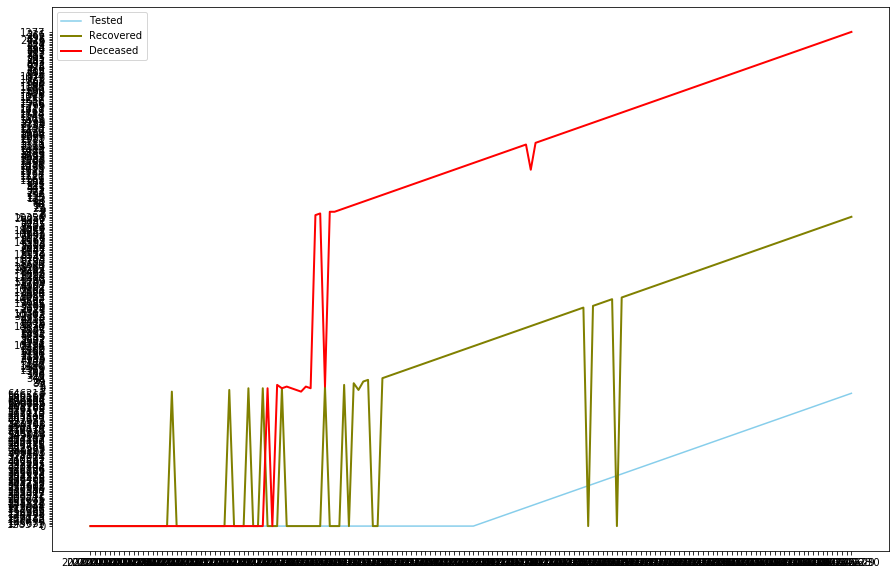

In [221]:
# To plot the values in a graph
import matplotlib.pyplot as plt
 
# Data
df=pd.DataFrame({'x': New_Data1['dateofrecord'], 'y1': New_Data1['dailytested'], 'y2': New_Data1['dailyrecovered'], 'y3': New_Data1['dailydeceased'] })
plt.figure(figsize=(15,10))
# multiple line plot
plt.plot( 'x', 'y1', data=df, markerfacecolor='blue', color='skyblue',label="Tested")
plt.plot( 'x', 'y2', data=df, color='olive', linewidth=2,label="Recovered")
plt.plot( 'x', 'y3', data=df, color='red', linewidth=2, label="Deceased")
plt.legend()

##### Exercise 3: To extract the data from documents (PDF)

Note: <br>
Data can be stored in documents & below explaination is to extract from PDF file. <br>
We used camelot library for the data extraction

In [117]:
#pip install camelot-py[cv]

In [12]:
import tkinter
import camelot

In [119]:
Data_New = camelot.read_pdf("2020-05-21-COVID19-Report-23.pdf", pages='11')

In [120]:
Data_New[0].df # Accessing the data

,0,1,2,3
0,State,% of total population\ninfected (mean [95%\ncr...,State,% of total population\ninfected (mean [95%\ncr...
1,Alabama\nAlaska\nArizona\nArkansas\nCalifornia...,1.9% [1.2%-3.0%]\n0.2% [0.0%-0.7%]\n2.3% [1.4%...,Montana\nNebraska\nNevada\nNew Hampshire\nNew ...,0.2% [0.0%-0.4%]\n1.2% [0.7%-2.0%]\n1.8% [1.3%...


In [121]:
Data_Extracted=Data_New[0].df

In [122]:
Data_Extracted.columns=Data_Extracted.iloc[0]
Data_Extracted.drop(Data_Extracted.index[0], inplace=True) 

In [123]:
Data_Extracted

,State,% of total population\ninfected (mean [95%\ncredible interval]),State,% of total population\ninfected (mean [95%\ncredible interval])
1,Alabama\nAlaska\nArizona\nArkansas\nCalifornia...,1.9% [1.2%-3.0%]\n0.2% [0.0%-0.7%]\n2.3% [1.4%...,Montana\nNebraska\nNevada\nNew Hampshire\nNew ...,0.2% [0.0%-0.4%]\n1.2% [0.7%-2.0%]\n1.8% [1.3%...


In [124]:
# Data Cleaning
Data_Extracted.columns = ['State1','Population infected1','State2','Population infected2']

In [125]:
State1=Data_Extracted['State1'].str.split('\n')
State2=Data_Extracted['State2'].str.split('\n')
Pop1=Data_Extracted['Population infected1'].str.split('\n')
Pop2=Data_Extracted['Population infected1'].str.split('\n')

In [126]:
State1=list(State1)
State1=State1[0]
State2=list(State2)
State2=State2[0]

In [127]:
Pop1=list(Pop1)
Pop1=Pop1[0]
Pop2=list(Pop2)
Pop2=Pop2[0]

In [128]:
State1.extend(State2) # Extending the lState ist 
Pop1.extend(Pop2) # Extending the population list 

In [129]:
Data_Extracted1=pd.DataFrame({'State':State1,'Population Infected':Pop1})

In [130]:
Data_Extracted1.head()

,State,Population Infected
0,Alabama,1.9% [1.2%-3.0%]
1,Alaska,0.2% [0.0%-0.7%]
2,Arizona,2.3% [1.4%-4.0%]
3,Arkansas,0.5% [0.3%-0.8%]
4,California,1.6% [1.1%-2.5%]


##### Exercise 4: To extract the data from RDBMS

In [ ]:
# Below is the way to extract data from Oracle DB

import cx_Oracle
ip = 'XX.XX.X.XXX'
port = YYYY
SID = 'DW'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)

connection = cx_Oracle.connect('ID', 'PASSWORD', dsn_tns)

In [85]:
query = """SELECT* 
           FROM EMPLOYEE
           WHERE E.DEPTNO=10"""
df_ora = pd.read_sql(query, con=connection)